# <center> Обзор подходов и текущих результатов для задачи speech-emotion-recognition

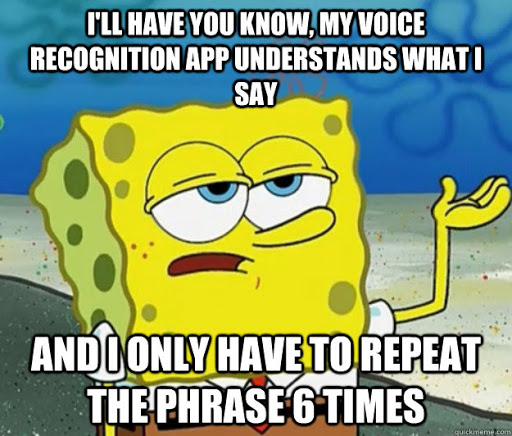

## Данные

Ниже представлены наборы данных с открытой лицензией, которые часто упоминаются в работах и публикациях (Английский язык).

1. RAVDESS. This dataset includes around 1500 audio file input from 24 different actors. 12 male and 12 female where these actors record short audios in 8 different emotions i.e 1 = neutral, 2 = calm, 3 = happy, 4 = sad, 5 = angry, 6 = fearful, 7 = disgust, 8 = surprised.
Each audio file is named in such a way that the 7th character is consistent with the different emotions that they represent.

1. SAVEE. This dataset contains around 500 audio files recorded by 4 different male actors. The first two characters of the file name correspond to the different emotions that the potray.

1. IEMOCAP C. Busso, M. Bulut, C. Lee, A. Kazemzadeh, E. Mower, S. Kim, J. Chang, S. Lee, and
S. Narayanan. Iemocap: Interactive emotional dyadic motion capture database. Journal of
Language Resources and Evaluation, 42(4), 2008.


### Данные на русском или схожем языке

Каких-то наборов данных я не нашёл, однако в публикациях описаны шаги для формирования небольшого набора данных и их не сложно повторить. Основной плюс в том, что размечать такие данные просто. 
Можно попросить 10 друзей и коллег с хорошей дикцией записать по несколько предложений разных категорий.

## Полезные работы 

Тут статьи с методами и репозитории с кодом. Первый пункт - предложенный проект, просто тут дублировал. Из полезных штук, определённо, `6` репозиторий, а так же `4` и `5` публикации.

### 1.

https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer 

Английский язык. Данные - `RAVDESS`.

По аудиофайлу строится спектрограмма, после этого добавляются статистические признаки. По полученным признакам и спектрограмме построены модели `CNN` и `LSTM`. На тестовой выборке для набора данных `RAVDESS` удалось достичь точности `70%`. Говорят, что она вырастет, если увеличить объем данных.

### 2.

A FIRST LOOK INTO A CONVOLUTIONAL NEURAL NETWORK FOR SPEECH EMOTION
DETECTION. Dario Bertero, Pascale Fung. DOI: 10.1109/ICASSP.2017.7953131.

Английский язык. Набор данных с TED.
По спектрограммам построены модели `SVM 63%` и `CNN 66% accuracy test`.

### 3.

Emotion Detection from Speech to Enrich Multimedia Content Feng Yu1*, Eric Chang2, Ying-Qing Xu2, Heung-Yeung Shum2 

Китайский язык, китайские данные.

Здесь неплохо описан этап с выделением признаков. Это можно использовать в задаче.

### 4.

https://arxiv.org/pdf/1701.08071.pdf 

Английский язык, Данные IEMOCAP.

Здесь применяется подход Connectionist Temporal Classification (CTC). Ранее с ним не сталкивался, но выглядит интересно. Тоже может быть полезно.

https://github.com/xuanjihe/speech-emotion-recognition - тут решение для датасета.

### 5.

https://ieeexplore.ieee.org/abstract/document/8615959 
Хинди и данные тоже из индии

Данные на языке Хинди.

Результаты `95%` accuracy для модели `SVM`. Здесь интересный preprocessing и feature extraction, по крайней мере подход несколько отличается от рассмотренных ранее.

### 6.

https://github.com/x4nth055/emotion-recognition-using-speech

Английский язык, несколько наборов данных.

Достаточно полезный проект. Несколько наборов данных. Сравнение разных методов препроцессига и моделей. Всё реализовано, технологии тоже не устаревшие. Можно взять за baseline.

# <centeR> Предсказание советов по истории <center>
Рассказать, как можно использовать ML для предсказания какой совет сработает лучше для данного пользователя на основе истории.

## Постановка задачи

Как сказано в описании, у нас есть интервалы по 25 минут и оценки эффективности после каждого интервала. Ещё есть рандомные опросы по состоянию и определение эмоций по голосу.

Для начала сосредоточимся на опыте. У нас есть советы по повышению эффективности, их какое-то конечное число. Если мы дали пользователю совет, то мы можем посмотреть на то, как изменится его продуктивность. Из этого мы можем сделать вывод о эффективности совета.

Итак, для каждого пользователя для каждого совета у нас есть оценка совета, которую мы строим по опыту. Она будет складываться из двух частей. Первая отвечает за продуктивность, а вторая за счастье.

$e_t$ - эмоциональное состояние в момент времени $t$

$p_t$ - оценка продуктивности в момент времени $t$

$$ eff(adv) = happy(adv) + prod(adv)  = w_1(e_t - e_{t-1}) + w_2 (p_t - p_{t-1}) $$

Если горизонт планирования у нас больше, чем 1 период, то мы можем смотреть на ожидаемые относительные показатели.

Важно понимать, в каких случаях нам нужно больше внимания уделить продуктивности, а в каких - эмоциям. Нужен определённый баланс. Пусть оценки этих показателей влияют на веса $w_1, w_2$.

$$ eff(adv, e, p) = happy(adv) + prod(adv)  = \frac{e_{max}}{e}(e_t - e_{t-1}) + \frac{p_{max}}{p} (p_t - p_{t-1}) $$

Здесь важно, чтобы $e$ и $p$ были нормированны.

## Простая модель

Получается, что мы живём в пространстве $(e, p)$, то есть для пользователя с текущим эмоциональным состоянием подбираем наиболее эффективный совет. Самое простое, что можно попробовать, это метрические методы (KNN, окна). Так мы будем искать наиболее похожее рабочее состояние и выбирать из похожих состояний эффективный совет. 

## Модель посложнее

А можно смотреть на продуктивность и эмоциональное состояние как на верменные ряды. Тогда для их анализа и предсказаний можно использовать, например `RNN`. Рассмотрим `LSTM` модель, там есть вектор, отвечающий за состояние. Он может описывать человека в данный момент времени. Так же у нас есть его прогнозное состояние на следующий период. В этом случае после совета мы сравним прогнозное состояние и реальным и из этого построим оценку совета. 

Здесь у нас получается мы прогнозируем показатели пользователя, и можем улучшать это прогноз путём советов. Например, если прогнозируется деперессия или кризис, мы заранее дадим совет чтобы этого избежать, по моему здорово.

## Проблемы

1. Холодный старт

2. Переобучение под лучший совет эмоционального состояния. Здесь, возможно, придётся добавлять случайную составляющую в выборе.

## Заключение

Это небольшой обзор на предметную область. В целом, мне очень нравится проект. Особенно распознование речи и предсказание советов. 